**Route Optimisation**

**Christofides Algorithm use case:** routing and route optimisation, hamiltonian cycle, MST (minimum spanning tree), complete graph whose edge weights obey the triangle inequality, minimum-weight perfect matching, Unite matching, form an Eulerian multigraph and eulerian circuit, Calculate Euler tour, Remove repeated vertices, giving the algorithm's output. Limitations: only for metric TSP ( travelling salesman Problem), where the triangle inequality i. The 1.5 approximation ratio, may not be sufficient for applications requiring extremely precise solutions. For large datasets computationally expensive.

**Eulerian circuit** - a cycle in a graph that visits every edge (= connecting line) exactly once and returns to the starting node.

**Perfect matching** - a set of edges (connecting lines) in a graph where every node is included exactly once, and no two edges share a common node. In the Christofides Algorithm, we use a minimum weight perfect matching to ensure the solution is as short as possible.

**Hamiltonian cycle** - a cycle in a graph that visits every vertex (=node) exactly once and returns to the starting node. This is essentially the solution to the TSP. Not all circuits are possible for hamiltonian cycle.

**MST ( minimum spanning tree)** - a subset of the edges of a connected, edge-weighted undirected graph that connects all the vertices together, without any cycles, and with the minimum possible total edge weight.


In [1]:
pip install netgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.7/96.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 339.3/339.3 kB 15.0 MB/s eta 0:00:00


In [2]:
import re
import pandas as pd
import numpy as np
import bs4
import requests
import spacy
from spacy import displacy
from spacy.matcher import Matcher
from spacy.tokens import Span
import networkx as nx
import itertools
import matplotlib.pyplot as plt
from IPython import display
import networkx.algorithms.approximation as nx_app
import math
from tqdm import tqdm
pd.set_option('display.max_colwidth', 200)
%matplotlib inline
from netgraph import Graph
from matplotlib.animation import FuncAnimation
from IPython import display

**1. Random Route Optimisation ( Travelling salesman )**

The route of the traveller is: [0, 10, 7, 2, 6, 1, 15, 14, 5, 17, 4, 9, 12, 18, 3, 19, 16, 8, 11, 13, 0]


/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:1438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


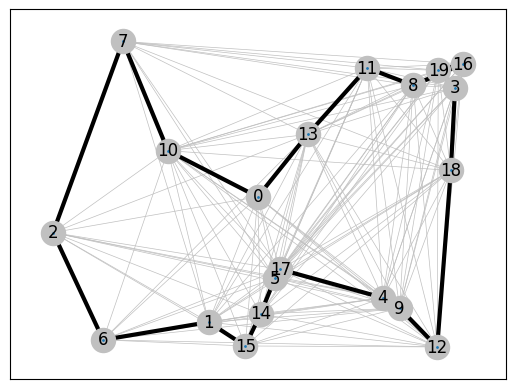

In [3]:
G = nx.random_geometric_graph(20, radius=0.8, seed=4) # Edges (connecting lines) count, radius = Round shape,seed = Vertex (nodes) density
pos = nx.get_node_attributes(G, "pos")

# Depot should be at (0,0)
pos[0] = (0.5, 0.5) # find the starting node near to the center 0

H = G.copy()

# Calculating the distances between the nodes as edge's weight.
for i in range(len(pos)):
    for j in range(i + 1, len(pos)):
        dist = math.hypot(pos[i][0] - pos[j][0], pos[i][1] - pos[j][1])
        dist = dist
        G.add_edge(i, j, weight=dist)

cycle = nx_app.christofides(G, weight="weight")
edge_list = list(nx.utils.pairwise(cycle))

# Draw closest edges on each node only
nx.draw_networkx_edges(H, pos, edge_color="silver", width=0.5)

nx.draw_networkx_nodes(
    G,
    pos,
    cmap=plt.cm.Greys_r, # appending r to colormap means reverse order
    node_color="silver")

# Draw the route
nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    edgelist=edge_list,
    edge_color="black",
    node_size=1,
    font_size=12,
    width=3,
    cmap=plt.cm.Greys)

print("The route of the traveller is:", cycle)
plt.show()

**2. 3D Graph without spatial data**

Disadvantage - visual edge lengths do not correspond with edge length number.

TSP Tour: A -> D -> B -> C -> A 



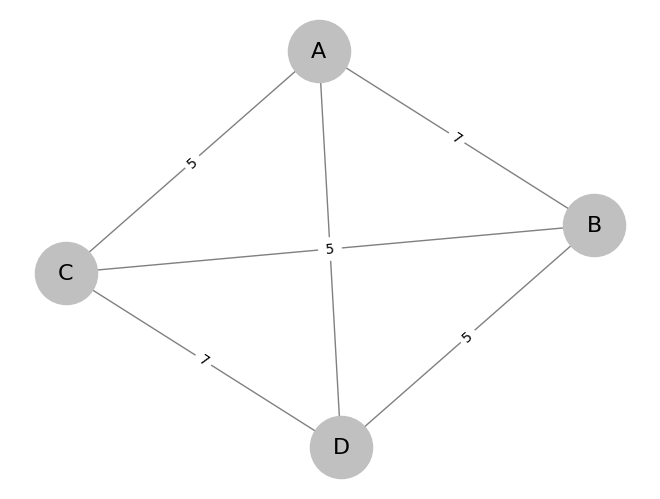

In [4]:
def christofides_tsp(graph):
    # Step 1: Compute the Minimum Spanning Tree (MST)
    mst = nx.minimum_spanning_tree(graph)

    # Step 2: Find nodes with odd (1,3,5,7,..) degree in the MST
    odd_degree_nodes = [v for v, d in mst.degree() if d % 2 == 1]

    # Step 3: Find Minimum Weight Perfect Matching among odd degree nodes
    subgraph = graph.subgraph(odd_degree_nodes)
    matching = nx.algorithms.matching.min_weight_matching(subgraph)

    # Step 4: Combine MST and Matching to form an Eulerian Graph
    eulerian_graph = nx.MultiGraph(mst)
    eulerian_graph.add_edges_from(matching)

    # Step 5: Find an Eulerian circuit
    eulerian_circuit = list(nx.eulerian_circuit(eulerian_graph))

    # Step 6: Shortcutting to form the final TSP tour
    tsp_tour = []
    visited = set()
    for u, v in eulerian_circuit:
        if u not in visited:
            tsp_tour.append(u)
            visited.add(u)
    tsp_tour.append(tsp_tour[0])  # Return to starting point

    return tsp_tour

# Example 3D Graph with Four Cities
graph = nx.Graph()
cities = ['A', 'B', 'C', 'D']
distances = {
    ('A', 'B'): 7, ('A', 'C'): 5, ('A', 'D'): 5,('D', 'C'): 7,
    ('B', 'C'): 5, ('B', 'D'): 5
}

for (u, v), w in distances.items():
    graph.add_edge(u, v, weight=w)

tsp_tour = christofides_tsp(graph)
print("TSP Tour:", " -> ".join(tsp_tour), "\n")
# Visualizing the Graph
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_color='silver', edge_color='gray', node_size=2000, font_size=16)
labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
plt.show()

**3. Planar 2 D Node graph without spatial Data**

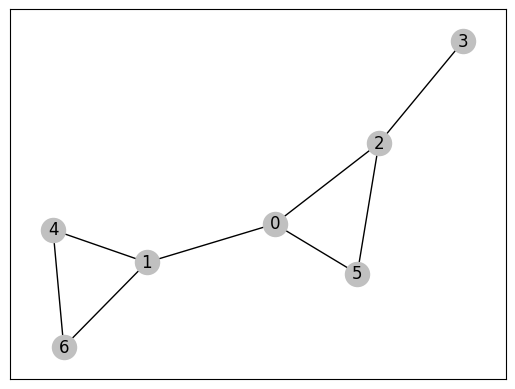

In [5]:
G = nx.Graph()

G.add_edge(0, 1, length=1)
G.add_edge(0, 2, length=1)
G.add_edge(2, 3, length=1)
G.add_edge(1, 4, length=1)
G.add_edge(0, 5, length=1)
G.add_edge(2, 5, length=1)
G.add_edge(1, 6, length=1)
G.add_edge(4, 6, length=1)
pos = nx.spring_layout(G)
length = nx.get_node_attributes(G, 'length')

# Draw the route
nx.draw_networkx(
    G,
    pos,
    cmap=plt.cm.Greys_r,
    node_color="silver"
)

plt.show()

**4. Shortest Distance osmnx, spatial data included**

In [6]:
pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 4.1 MB/s eta 0:00:00


In [7]:
import osmnx as ox

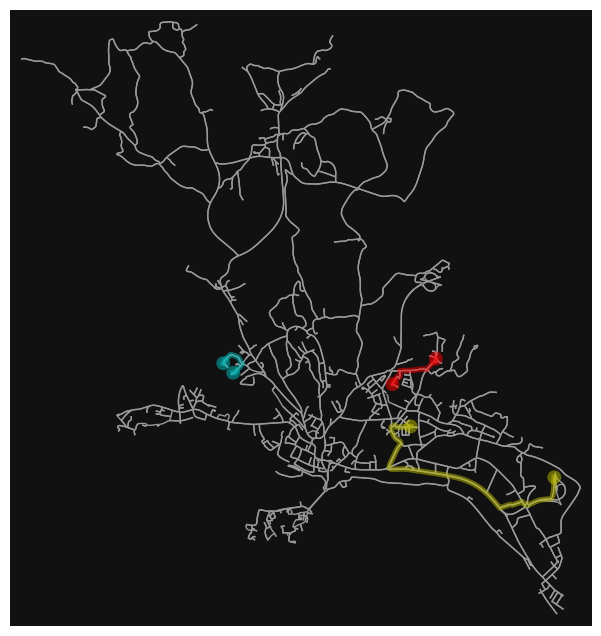

In [8]:
#G = ox.graph_from_place('Piedmont, CA, USA', network_type='drive')
G = ox.graph_from_place('Lindau, DE', network_type='drive')

# impute missing edge speeds and calculate free-flow travel times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

# calculate 3 shortest paths minimizing travel time
wt = 'travel_time'
route1 = nx.shortest_path(G, list(G)[10], list(G)[-10], weight=wt)
route2 = nx.shortest_path(G, list(G)[0], list(G)[-1], weight=wt)
route3 = nx.shortest_path(G, list(G)[-100], list(G)[100], weight=wt)

# plot the 3 routes
routes = [route1, route2, route3]
colors = ['r', 'y', 'c']
fig, ax = ox.plot_graph_routes(G, routes, route_colors=colors, node_size=0)


**5. Shortest Distance osmnx, spatial data included**

In [9]:
# load Hamburg in Germany
place = "Hamburg, Germany"
G = ox.graph_from_place(place, network_type="drive")

# Hamburg Hafen coordinates
A_lat, A_lon = 53.5400, 9.9828
# Hamburg Flughafen coordinates
B_lat, B_lon = 53.6304, 9.9882

# fetch the nearest node w.r.t coordinates
A_node = ox.distance.nearest_nodes(G, A_lon, A_lat)
B_node = ox.distance.nearest_nodes(G, B_lon, B_lat)

print("Hafen Node: {A_node}, \
Flughafen Node: {B_node}".format(
    A_node=A_node, B_node=B_node))

Hafen Node: 25737307, Flughafen Node: 31325729


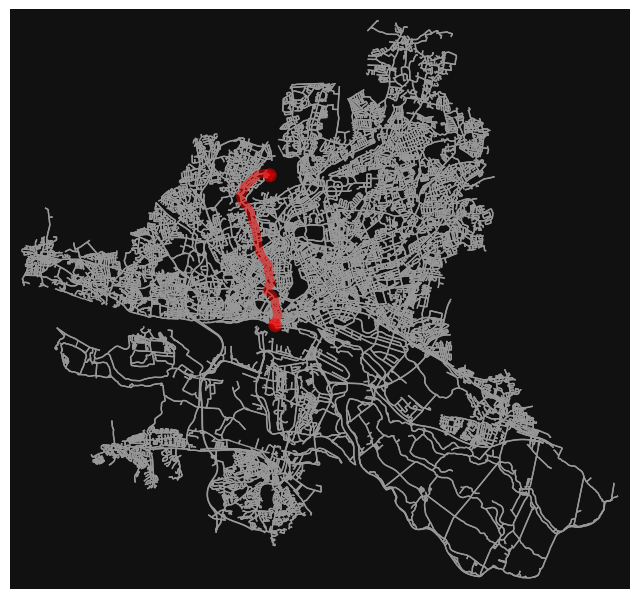

In [10]:
# orgin node and destination node
orig, dest = 25737307, 31325729

# find shortest path
route_nodes = ox.routing.shortest_path(G, orig, dest, weight="length")

# plot the shortes path
fig, ax = ox.plot_graph_route(G, route_nodes, route_color="r",
                              route_linewidth=6, node_size=0)

In [11]:
pip install folium matplotlib mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 10.2 MB/s eta 0:00:00


In [12]:
def generate_multindex(route_nodes):
    multiindex_list = []
    # append the index to list
    for u, v in zip(route_nodes[:-1], route_nodes[1:]):
        multiindex_list.append((u, v, 0))
    return multiindex_list


# get edges from from above multidigraph
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

# generate multiindex based on generated shortest route
multiindex_list = generate_multindex(route_nodes)
# fetch edge details based on multi index list
shrt_gdf_edges = gdf_edges[gdf_edges.index.isin(multiindex_list)]
# plot the shortest route on map
shrt_gdf_edges.explore(color="red")

https://en.wikipedia.org/wiki/Christofides_algorithm


https://towardsdatascience.com/solving-the-travelling-salesman-problem-for-germany-using-networkx-in-python-2b181efd7b07/

https://priyadarshanghosh26.medium.com/christofides-algorithm-the-secret-weapon-for-route-optimization-d2b9ec68d66e

